# Code to generate heatmaps for CAZy families/subgroups/tree_dirs for positive selection ranking

After perfoming positive selection analysis using CodeML at each CAZy family and for each branch site, the results were filtered using the **codeml.ipynb** and csv files were gernerated storing information for the CAZy families and tree dirs under positive selection (providing p-values). **Moreover, a csv file called **final_analysis.csv** was generated storing all positive selected branch sites**. 

In order to make some sense of these sites we will have to visualise the branch sites under positive selection on the RAxML phylogenetic trees. 
We do that by acceessing the correpsonding CAZy families, then the apprpoprriate tree directories  Those trees will be labelled with a **#1** at the branch site under positive selection. To visulaise **#1** we will use ETE. The python script **leaves.py** includes three functions which help us to:
1. Remove any extrenal labelled nodes 
2. Get the labelled nodes
3. Cretae a dictionary with **CAZy_family : leaves** in order to generate heatmaps etc of the positive selected cazy families and the nodes they seem to be under positive selection 


In [1]:
import subprocess
import pandas as pd
from leaves import external_nodes, cazy_leaves
import seaborn as sns

In [2]:
# Assing the directory where all results are stored (to get CAZy families etc)
directory = "../PhD_Project/PS_analysis/all_results"
# Assign result file with qvals included for all codeml results which will be loaded as dataframe 
result_file = "./codeml_bind_data_qvals.csv"
dataframe_results = pd.DataFrame.from_csv(result_file, index_col=None)

In [ ]:
# Call the function external nodes from leaves
remove_leaves = external_nodes(directory, dataframe_results )

In [ ]:
# Create a dataframe with the cazy families and tree directories of the labelled external nodes/leaves
nodes = [('CAZY_FAM', remove_leaves[0]),
         ('tree_dir', remove_leaves[1])]
external_nodes = pd.DataFrame.from_items(nodes)    
external_nodes

In [ ]:
# Add an identifier being the cazy family combined with the tree directory to both results and external nodes dataframes
external_nodes["identifier"] = external_nodes["CAZY_FAM"] +"_"+ external_nodes["tree_dir"]
dataframe_results["identifier"]= dataframe_results['CAZy_Family'] +"_"+ dataframe_results["tdir"]
no_leaves_df = dataframe_results[~dataframe_results['identifier'].isin(external_nodes["identifier"])]
no_leaves_df
no_leaves_df.to_csv('no_external_nodes_ps.csv', mode='a', header=True)

Then filter the **no_external_nodes_ps.csv** file using the filter_data R script for q values and write out a file with the ones which we set to be positive selected written as **final_ps.csv**

In [3]:
# Assign the csv file which is filtered based on q values using the filter_data r code
final_ps = ("./final_ps.csv")
final_df = pd.DataFrame.from_csv(final_ps)
final_df


,CAZy_Family,tdir,lnL0,lnL1,LRT,p.value,lfdr,qvalue,localfdr,identifier
1,CBM32_2,tdir12,-13947.480089,-13870.459128,154.041922,2.267604e-35,1.205680e-21,3.868266e-34,0.000002,CBM32_2_tdir12
2,CBM32_2,tdir15,-13941.729186,-13914.764366,53.929640,2.077992e-13,5.112201e-11,1.772405e-12,0.000002,CBM32_2_tdir15
3,CBM32_2,tdir18,-13939.146966,-13890.012707,98.268518,3.653280e-23,6.857929e-12,4.154711e-22,0.000002,CBM32_2_tdir18
4,CBM32_2,tdir19,-13951.720239,-13926.851088,49.738302,1.756825e-12,4.477118e-06,1.198775e-11,0.000002,CBM32_2_tdir19
5,CBM32_2,tdir20,-13932.819881,-13821.099776,223.440210,1.606985e-50,7.483701e-34,5.482656e-49,0.000002,CBM32_2_tdir20
6,GH104_group_7,tdir6,-4313.939834,-4172.377876,283.123916,1.566224e-63,1.000000e+00,1.409602e-62,0.000002,GH104_group_7_tdir6
7,GH104_group_8,tdir6,-4530.582711,-4390.863409,279.438604,9.952553e-63,1.000000e+00,1.094781e-61,0.000004,GH104_group_8_tdir6
8,GH19_group_1,tdir20,-9672.602986,-9608.545433,128.115106,1.059185e-29,4.138950e-25,1.706465e-28,0.000001,GH19_group_1_tdir20
9,GH19_group_1,tdir31,-9611.835700,-9527.960042,167.751316,2.292557e-38,3.284569e-28,7.387130e-37,0.000001,GH19_group_1_tdir31
10,GH19_group_1,tdir37,-9672.602986,-9615.627540,113.950892,1.335760e-26,8.505622e-25,1.434705e-25,0.000001,GH19_group_1_tdir37


In [4]:
# Call the function cazy_leaves from leaves script 
resdict = cazy_leaves(directory, final_df)

In [5]:
# Get CAZy families 
families = resdict.keys()
families

dict_keys(['GT41_2', 'GH19_group_8', 'GH19_group_1', 'GH19_group_4', 'CBM32_2', 'GH19_group_5', 'GH73_group_1', 'GH104_group_8', 'GH104_group_7', 'GH19_group_9', 'GH19_group_2', 'GH19_group_3', 'GH73_group_3', 'GT2_group_14', 'GH73_group_5', 'GH73_group_4', 'GH73_group_6', 'GH19_group_6', 'PL9_group_2', 'GH73_group_2'])

In [6]:
# get leaves
def flatten(l):
    return [i for sublist in l for i in sublist]
leaves = set(flatten(resdict.values())) 

In [7]:
# Create an empty dataframe with columns being the levaes and index the cazy famiilies. Fill it with zeros. 
df = pd.DataFrame(0, columns=leaves, index=families)

In [8]:
#Loop over tge key:value in the dictionary to populate the data frame 
for k, v in resdict.items():
    df.loc[k][v ]+= 1

In [9]:
df['Total'] = df.sum(axis=1)
df.loc['Total']= df.sum()


In [10]:
#generate a heatmap 
ax = sns.heatmap(df, annot=True, fmt="d", linewidths=.10)

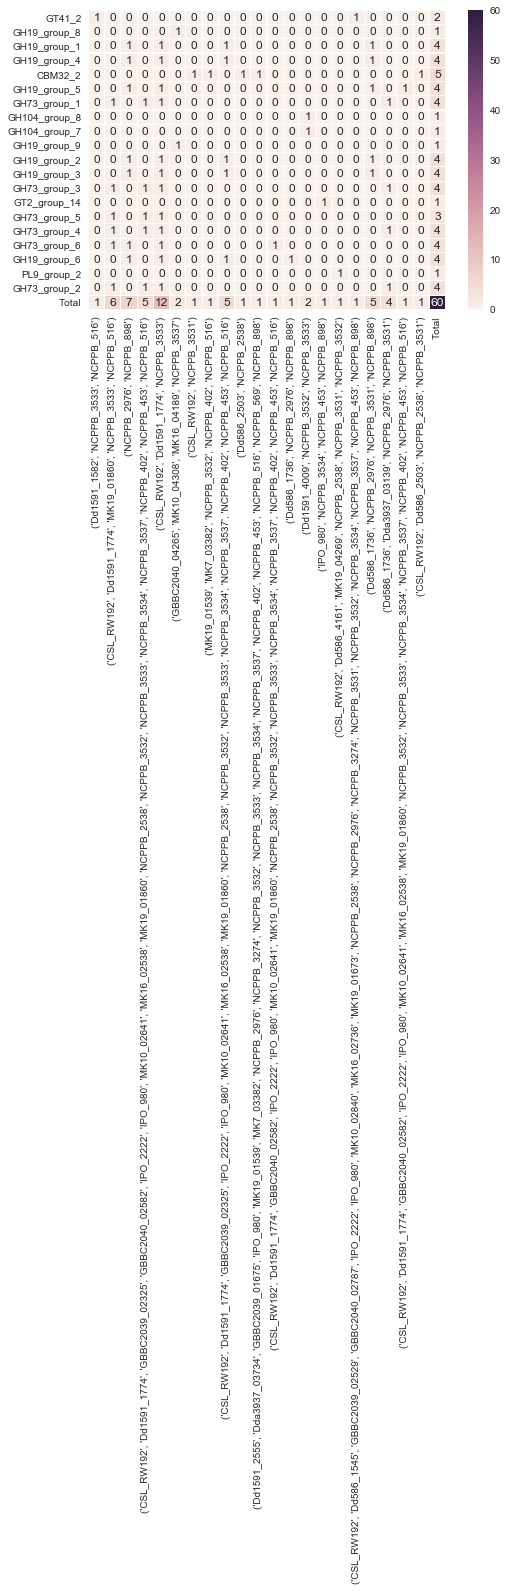

In [11]:
# Save heatmpap as a figure and then print out as png
figure = ax.get_figure()
figure

In [12]:
figure.savefig("full_analysis_long_names.png")

In [13]:
# get the leaves as groups 
for i in range(len(leaves)):
    key_alias = "group" + "_" + str(i)
    print(key_alias)

group_0
group_1
group_2
group_3
group_4
group_5
group_6
group_7
group_8
group_9
group_10
group_11
group_12
group_13
group_14
group_15
group_16
group_17
group_18
group_19
group_20


In [15]:
# Change column names to group_1,2,3 etc for better readability
df.columns = ['group%s' % i for i in range(len(df.columns))]
df.columns = ['group%s' % i for i, c in enumerate(df.columns)]
df.columns

Index(['group0', 'group1', 'group2', 'group3', 'group4', 'group5', 'group6',
       'group7', 'group8', 'group9', 'group10', 'group11', 'group12',
       'group13', 'group14', 'group15', 'group16', 'group17', 'group18',
       'group19', 'group20', 'group21'],
      dtype='object')

In [ ]:
df['Total'] = df.sum(axis=1)
df.loc['Total']= df.sum()


In [16]:
# Save positive selected families as a csv file
df.to_csv('positive_selected_qvals.csv')

In [17]:
#generate a heatmap 
ax1 = sns.heatmap(df, annot=True, fmt="d", linewidths=.10)

In [18]:
# Save heatmpap as a figure and then print out as png
fig = ax1.get_figure()
fig
fig.savefig("heatmap_full_analysis.png")

In [ ]:
# Save heatmpap as a figure and then print out as png
fig = ax.get_figure()
fig.savefig("positive_selected_qvals.png")